In [1]:
#penggunaan as disini, artinya menggantikan pemanggilan numpy dengan prefix np untuk proses berikutnya
import numpy as np #berfungsi untuk melakukan pengolahan array dan matriks
#penggunaan as disini, artinya menggantikan pemanggilan cv2 dengan prefix cv untuk proses berikutnya
import cv2 as cv #berfungsi untuk melakukan pengolahan struktur gambar seperti warna
#penggunaan as disini, artinya menggantikan pemanggilan fungsi pyplot pada matplotlib dengan prefix plt untuk proses berikutnya
import matplotlib.pyplot as plt #berfungsi untuk membuat beberapa perubahan citra seperti membuat citra, membuat area pot dalam citra, dan membuat histogram citra

Script di atas merupakan pemanggilan library yang akan digunakan untuk pengolahan citra.

### SOAL 1
##### Lakukan Rekonstruksi Wavelet terhadap citra pada folder assets

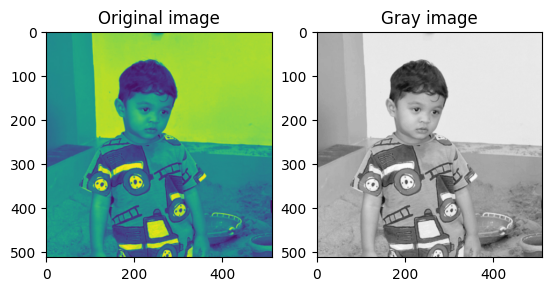

In [2]:
LL = plt.imread('LL.jpg') #menggunakan fungsi imread dari plt untuk membaca citra yang akan diolah. kemudian disimpan di variabel LL
plt.subplot(121)
plt.title("Original image")
plt.imshow(LL) #berfungsi untuk menampikan gambar yang kita import
gray_LL = cv.cvtColor(LL, cv.COLOR_BGR2GRAY) #foto yang telah diimport sebelumnya dikonversi menjadi grayscale menggunakan syntax "cv.COLOR_BGR2GRAY"
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray_LL, cmap = 'gray') #script ini adalah perintah untuk menampilkan gambar yang diimport dengan mode grayscale

Script di atas merupakan sebuah kode untuk menampilkan citra dengan sub-band dengan frekuensi rendah dan resolusi rendah, lalu dikonversi menjadi grayscale.

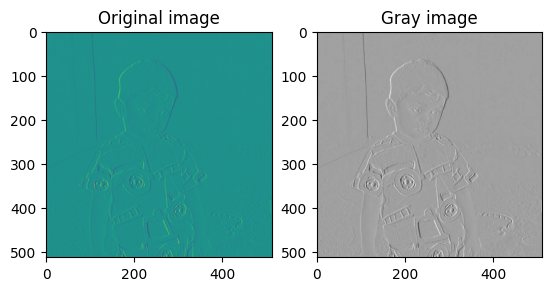

In [3]:
LH = plt.imread('LH.jpg') #menggunakan fungsi imread dari plt untuk membaca citra yang akan diolah. kemudian disimpan di variabel LH
plt.subplot(121)
plt.title("Original image")
plt.imshow(LH) #berfungsi untuk menampikan gambar yang kita import
gray_LH = cv.cvtColor(LH, cv.COLOR_BGR2GRAY) #foto yang telah diimport sebelumnya dikonversi menjadi grayscale menggunakan syntax "cv.COLOR_BGR2GRAY"
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray_LH, cmap = 'gray') #script ini adalah perintah untuk menampilkan gambar yang diimport dengan mode grayscale

Script di atas merupakan sebuah kode untuk menampilkan citra dengan sub-band dengan frekuensi rendah dan resolusi tinggi, lalu dikonversi menjadi grayscale.

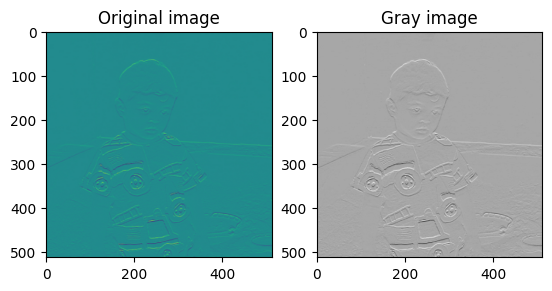

In [4]:
HL = plt.imread('HL.jpg') #menggunakan fungsi imread dari plt untuk membaca citra yang akan diolah. kemudian disimpan di variabel HL
plt.subplot(121)
plt.title("Original image")
plt.imshow(HL) #berfungsi untuk menampikan gambar yang kita import
gray_HL = cv.cvtColor(HL, cv.COLOR_BGR2GRAY) #foto yang telah diimport sebelumnya dikonversi menjadi grayscale menggunakan syntax "cv.COLOR_BGR2GRAY"
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray_HL, cmap = 'gray') #script ini adalah perintah untuk menampilkan gambar yang diimport dengan mode grayscale

Script di atas merupakan sebuah kode untuk menampilkan citra dengan sub-band dengan frekuensi tinggi dan resolusi rendah, lalu dikonversi menjadi grayscale.

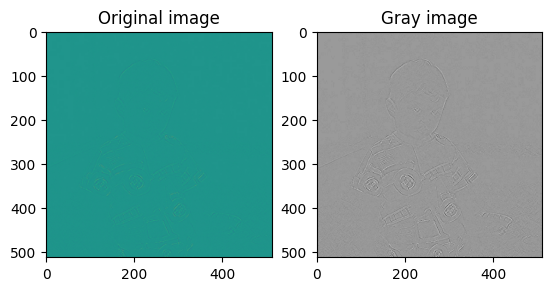

In [5]:
HH = plt.imread('HH.jpg') #menggunakan fungsi imread dari plt untuk membaca citra yang akan diolah. kemudian disimpan di variabel HH
plt.subplot(121)
plt.title("Original image")
plt.imshow(HH) #berfungsi untuk menampikan gambar yang kita import
gray_HH = cv.cvtColor(HH, cv.COLOR_BGR2GRAY) #foto yang telah diimport sebelumnya dikonversi menjadi grayscale menggunakan syntax "cv.COLOR_BGR2GRAY"
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray_HH, cmap = 'gray') #script ini adalah perintah untuk menampilkan gambar yang diimport dengan mode grayscale

Script di atas merupakan sebuah kode untuk menampilkan citra dengan sub-band dengan frekuensi tinggi dan resolusi tinggi, lalu dikonversi menjadi grayscale.

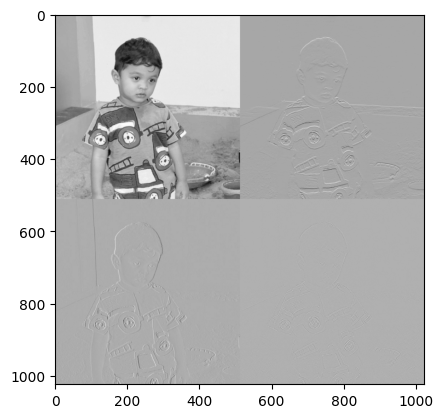

In [6]:
def gabung (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1) #fungsi gabung melakukan penggabungan antara array LL dan HL secara horizontal (baris_1) menggunakan fungsi np.concatenate dengan parameter axis=1
    baris_2 = np.concatenate ((LH, HH), axis = 1) #fungsi gabung melakukan penggabungan antara array LH dan HH secara horizontal (baris_2) menggunakan fungsi np.concatenate dengan parameter axis=1
    return np.concatenate ((baris_1, baris_2), axis = 0) #fungsi gabung menggabungkan array baris_1 dan baris_2 secara vertikal (hasil) menggunakan fungsi np.concatenate dengan parameter axis=0
hasil = gabung (gray_LL, gray_LH, gray_HL, gray_HH) #fungsi gabung dipanggil dengan empat parameter, yaitu gray_LL, gray_LH, gray_HL, dan gray_HH, kemudian hasilnya disimpan dalam variabel hasil
plt.imshow(hasil,'gray') #variabel hasil kemudian ditampilkan menggunakan plt.imshow dengan parameter 'gray' yang akan menampilkan gambar dalam format grayscale

Script di atas mendefinisikan sebuah fungsi bernama gabung dengan empat parameter masukan, yaitu LL, LH, HL, dan HH. Fungsi ini menggunakan library NumPy untuk melakukan penggabungan (concatenation) array.

In [7]:
def rekonstruksi(w, x, y, z):
    #membuat variabel baris dan kolom sebagai ukuran sebuah citra hasil rekontruksi, dimana ukurannya 2 kali lebih besar dari gambar yang digabungkan
    baris, kolom = w.shape 
    kolom = kolom * 2
    baris = baris * 2 
    #membuat array kosong dengan variabel img, LL, LH, HL dan HH dengan ukuran baris dan kolom (2 kali lebih besar)
    img = np.zeros([kolom,baris]) 
    LL, LH = np.zeros([kolom,baris]), np.zeros([kolom,baris]) 
    HL, HH = np.zeros([kolom,baris]), np.zeros([kolom,baris]) 
    
    #setiap selang 1 indeks pada variabel LL, LH, HL dan HH akan di isi dengan nilai yang berada pada masing masing indeks variabel w, x, y dan z
    for i in range(0, baris, 2):
        for j in range(0, kolom, 2):
            LL[i][j] = w[int(i / 2)][int(j / 2)]
            LH[i][j] = x[int(i / 2)][int(j / 2)]
            HL[i][j] = y[int(i / 2)][int(j / 2)]
            HH[i][j] = z[int(i / 2)][int(j / 2)]
    
    #selang indeks baris yang kosong pada variabel LL, LH, HL dan HH akan di isi dengan nilai yang berada pada masing masing indeks variabel LL, HL, LH dan HH
    for i in range(1, baris, 2):
        for j in range(kolom):
            LL[i][j] = LL[i - 1][j]
            HL[i][j] = HL[i - 1][j]
            LH[i][j] -= LH[i - 1][j]
            HH[i][j] -= HH[i - 1][j]
            
    #selang indeks kolom yang kosong pada variabel LL, LH, HL dan HH akan di isi dengan nilai yang berada pada masing masing indeks variabel LL, HL, LH dan HH
    for i in range(baris):
        for j in range(1, kolom, 2):
            LL[i][j] = LL[i][j - 1]
            HL[i][j] -= HL[i][j - 1]
            LH[i][j] = LH[i][j - 1]
            HH[i][j] -= HH[i][j - 1]
    
    #penggabungan nilai indeks pada variabel LL, LH, HL, HH ke dalam satu matriks citra yaitu variabel img, lalu kemudian mengembalikan nilai img 
    for i in range(baris):
        for j in range(kolom):
            img[i][j] += (LL[i][j] + LH[i][j] + HL[i][j] + HH[i][j])
    return img
hasil = rekonstruksi

Script di atas mendefinisikan sebuah fungsi bernama rekonstruksi dengan empat parameter input yaitu w, x, y, dan z. Fungsi ini digunakan untuk merekonstruksi citra asli dari koefisien-koefisien hasil penguraian citra menggunakan rekonstruksi wavelet.
Setelah matriks LL, LH, HL, dan HH terisi dengan nilai koefisien, nilai-nilai tersebut akan digunakan untuk merekonstruksi citra asli dengan melakukan proses inversi DWT pada setiap sub-band.

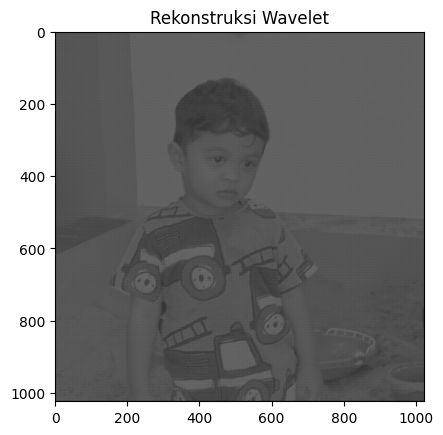

In [8]:
#menyimpan hasil rekontruksi citra dari citra pada variabel gray_LL, gray_LH, gray_HL dan gray_HH ke dalam variabel hasil lalu kemudian menampilkannya dengan fungsi imshow pada matplotlib
hasil = rekonstruksi(gray_LL, gray_LH, gray_HL, gray_HH) 
plt.title("Rekonstruksi Wavelet")
plt.imshow(hasil, cmap = 'gray')

Script di atas merupakan kode untuk merekonstruksi gambar dari citra hasil dekomposisi wavelet menggunakan fungsi rekonstruksi yang didefinisikan sebelumnya. Citra yang direkonstruksi terdiri dari empat bagian, yaitu gray_LL, gray_LH, gray_HL, dan gray_HH.

### SOAL 2
##### Lakukan Dekomposisi Wavelet Level 1 pada citra hasil rekonstruksi menggunakan kernel x
##### kernel x :  low pass filter = [0.7, 0.7], high pass filter = [-0.7, 0.7]

In [9]:
#melakukan inisialisasi pada kernel atau filter
low_pass = np.array([0.7, 0.7])
high_pass = np.array([-0.7, 0.7])

Script di atas berfungsi menginisialisasi kernel x

In [10]:
#fungsi row_padding berfungsi untuk menambahkan padding 0 sebanyak n pada bagian baris dari citra aslinya, dengan cara setiap n didapatkan dari panjang kernel dikurangi 1, kemudian dilakukan penambahan padding dengan fungsi pad pada numpy lalu menyimpan dan mengembalikan kembali citra hasil padding pada variabel result
def row_padding (img, n):
    n = len(n) - 1
    result = np.pad (img, ([0, 0],[0, n]))
    return result

Script di atas merupakan sebuah fungsi yang digunakan untuk melakukan padding atau penambahan piksel pada setiap baris citra. Fungsi row_padding() menerima dua parameter, yaitu img dan n. Parameter img merupakan citra yang akan dilakukan padding, sedangkan n adalah jumlah piksel yang ingin ditambahkan pada setiap baris citra.

In [11]:
#fungsi column_padding berfungsi untuk menambahkan padding 0 sebanyak n pada bagian kolom dari citra aslinya, dengan cara setiap n didapatkan dari panjang kernel dikurangi 1, kemudian dilakukan penambahan padding dengan fungsi pad pada numpy lalu menyimpan dan mengembalikan kembali citra hasil padding pada variabel result
def column_padding (img, n):
    n = len(n) - 1
    result = np.pad (img, ([0, n],[0, 0]))
    return result

Script di atas merupakan sebuah fungsi yang digunakan untuk melakukan padding atau penambahan piksel pada setiap kolom citra. Fungsi column_padding() menerima dua parameter, yaitu img dan n. Parameter img merupakan citra yang akan dilakukan padding, sedangkan n adalah jumlah piksel yang ingin ditambahkan pada setiap kolom citra.

In [12]:
#fungsi row_convolution berfungsi untuk melakukan konvolusi pada citra hasil padding dengan kernel atau filter, 2 perulangan awal digunakan untuk mengakses tiap indeks atau pixel yang berada pada citra hasil padding, kemudian perulangan yang berada di dalamnya digunakan sebagai konvolusi yang nantinya hasil konvolusi tiap indeksnya akan tersimpan dan dikembalikan pada variabel result
def row_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i, j + k])
    return result

Script di atas merupakan sebuah fungsi untuk melakukan konvolusi pada sebuah citra pada setiap baris citra dengan menggunakan kernel tertentu. Fungsi ini memiliki tiga parameter masukan, yaitu pad yang merupakan citra hasil padding pada setiap baris citra, kernel yang merupakan kernel yang digunakan untuk konvolusi pada setiap baris citra, dan img yang merupakan citra asli yang akan diolah

In [13]:
#fungsi column_convolution berfungsi untuk melakukan konvolusi pada citra hasil padding dengan kernel atau filter, 2 perulangan awal digunakan untuk mengakses tiap indeks atau pixel yang berada pada citra hasil padding, kemudian perulangan yang berada di dalamnya digunakan sebagai konvolusi yang nantinya hasil konvolusi tiap indeksnya akan tersimpan dan dikembalikan pada variabel result
def column_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i + k, j])
    return result

Pada fungsi ini, terdapat tiga loop. Loop pertama digunakan untuk mengiterasi setiap baris citra. Loop kedua digunakan untuk mengiterasi setiap kolom citra. Loop terakhir digunakan untuk mengiterasi setiap nilai dalam kernel. Di dalam loop ketiga, operasi konvolusi dilakukan dengan mengalikan nilai pada kernel dengan nilai yang berada pada pad yang terletak pada posisi yang diatur oleh loop tersebut. Setiap hasil perkalian kemudian dijumlahkan untuk menghasilkan nilai pada koordinat (i,j) dari array hasil konvolusi (result).

In [14]:
#fungsi row_DownSampling berfungsi untuk mengambil sebagian hasil dari row_convolution, indeks yang diambil akan berselang 1 baris dari citra aslinya, kemudian menyimpan dan mengembalikannya pada variabel result
def row_DownSampling(array):
    baris = int(array.shape[0] / 2)
    kolom = int(array.shape[1])
    result = np.zeros((baris, kolom))
    index = 0
    for i in range (baris): 
        for j in range (kolom):
            result[i][j] = array[index][j]
        index += 2
    return result

Fungsi row_DownSampling digunakan untuk melakukan downsampling atau mengurangi resolusi gambar pada dimensi baris dengan mengambil setiap pixel genap saja.
Input dari fungsi ini adalah array gambar dengan dimensi (baris, kolom). Dimensi hasil downsampling adalah (baris/2, kolom).
Fungsi pertama-tama menghitung dimensi baris dan kolom dari array input, kemudian membuat array kosong dengan dimensi hasil downsampling. Selanjutnya, fungsi melakukan iterasi pada setiap baris array input dan mengambil setiap pixel genap untuk dimasukkan ke dalam array hasil downsampling.
Setelah selesai melakukan iterasi pada setiap baris, fungsi mengembalikan array hasil downsampling sebagai output.

In [15]:
#fungsi column_DownSampling berfungsi untuk mengambil sebagian hasil dari column_convolution, indeks yang diambil akan berselang 1 kolom dari citra aslinya, kemudian menyimpan dan mengembalikannya pada variabel result
def column_DownSampling(array):
    baris = int(array.shape[0])
    kolom = int(array.shape[1] / 2) 
    result = np.zeros((baris, kolom))
    for i in range (baris): 
        index = 0
        for j in range(kolom): 
            result[i][j] = array[i][index]
            index +=2
    return result

Fungsi column_DownSampling digunakan untuk melakukan subsampling pada sisi kolom dari sebuah array. Subsampling dilakukan dengan mengambil setiap nilai kolom genap pada array input dan mengabaikan setiap nilai kolom ganjil.
Pada fungsi ini, input array memiliki ukuran baris x kolom dan output array memiliki ukuran yang sama pada dimensi baris namun ukuran pada dimensi kolom dihasilkan setengah dari ukuran dimensi kolom input array.
Output dari fungsi ini adalah array dengan ukuran setengah pada dimensi kolom dari input array dan hanya mengandung nilai pada kolom genap.

In [16]:
def dekomposisi (citra, f1, f2):
    Pad1 = row_padding (citra, f1) #melakukan padding pada baris citra input dengan filter f1 (padding dilakukan agar dapat melakukan konvolusi pada batas baris citra)
    Konvolusi1 = row_convolution(Pad1, f1, citra) #melakukan konvolusi baris pada citra input dengan filter f1 (menghasilkan citra level 1 detail horizontal LH dan citra level 1 detail vertikal HL)
    DownSampling1 = column_DownSampling (Konvolusi1) #melakukan downsampling kolom pada citra hasil konvolusi untuk menghasilkan citra level 1 LL

    Pad2 = column_padding (DownSampling1, f2)
    Konvolusi2 = column_convolution(Pad2,f2, DownSampling1) #melakukan konvolusi kolom pada citra level 1 LL dengan filter f2 (menghasilkan citra level 2 detail horizontal LH dan citra level 2 detail vertikal HL)
    DownSampling2 = row_DownSampling (Konvolusi2) #melakukan downsampling baris pada citra level 2 hasil konvolusi untuk menghasilkan citra level 2 LL

    Result = DownSampling2
    return Result

Fungsi dekomposisi berfungsi untuk melakukan dekomposisi wavelet dengan parameternya suatu citra dan 2 buah filter, yang dimana proses di dalamnya terdapat konvolusi dan down sampling yang dilakukan masing masing 2 kali berdasarkan filternya, kemudian hasil akan dikembalikan dengan variabel result.

In [17]:
w1 = dekomposisi(hasil, low_pass, low_pass)
x1 = dekomposisi(hasil, low_pass, high_pass)
y1 = dekomposisi(hasil, high_pass, low_pass)
z1 = dekomposisi(hasil, high_pass, high_pass)

Script di atas berfungsi memanggil fungsi dekomposisi untuk melakukan dekomposisi wavelet pada variabel hasil, dengan parameter filter yang berbeda beda sehingga menghasilkan output yang berbeda yang disimpan dalam variabel w1, x1, y1 dan z1 sebagai bentuk dekomposisi level 1

In [18]:
#fungsi Display1 berfungsi untuk menampilkan hasil dekomposisi suatu citra sehingga terdapat 4 hasil dekomposisi yang disatukan dalam satu citra dengan bantuan fungsi concatenate untuk menyatukan citra, kemudian hasil gabungan 4 citra dekomposisi disimpan dan dikembalikan dalam variabel result
def Display1 (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1)
    baris_2 = np.concatenate ((LH, HH), axis = 1)

    Result  = np.concatenate ((baris_1, baris_2), axis = 0)
    return Result

Script di atas mendefinisikan sebuah fungsi bernama Display1 dengan empat parameter masukan, yaitu LL, LH, HL, dan HH. Fungsi ini menggunakan library NumPy untuk melakukan penggabungan (concatenation) array dan mengembalikan hasil penggabungan dengan menggunakan return.

In [19]:
def Display(w1, x1, y1, z1):
   plt.figure(figsize = (15, 15))
   plt.subplot(1, 4, 1)
   plt.imshow(w1, cmap = 'gray')
   plt.subplot(1, 4, 2)
   plt.imshow(x1, cmap = 'gray')
   plt.subplot(1, 4 ,3)
   plt.imshow(y1, cmap = 'gray')
   plt.subplot(1, 4, 4)
   plt.imshow(z1, cmap = 'gray')

Script di atas mendefinisikan sebuah fungsi bernama "Display" yang memiliki empat parameter: w1, x1, y1, dan z1. Kemudian, untuk setiap subplot, fungsi plt.imshow() digunakan untuk menampilkan citra yang sesuai (w1, x1, y1, atau z1) dengan menggunakan skema warna 'gray'. Fungsi ini berguna untuk memvisualisasikan beberapa citra secara bersamaan dan membandingkan perbedaan dan persamaan antara citra-citra tersebut.

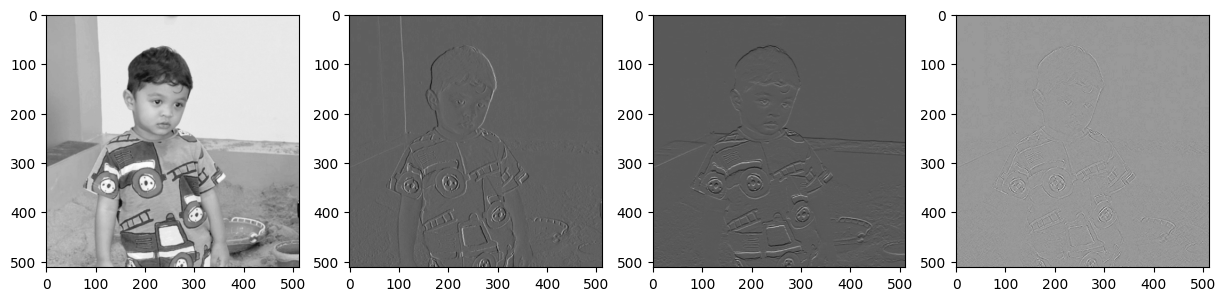

In [20]:
Display (w1, x1, y1, z1)

Script memanggil fungsi "Display" dengan empat parameter yaitu w1, x1, y1, dan z1. Fungsi "Display" akan dieksekusi dengan mengambil keempat parameter tersebut sebagai input, kemudian menampilkan empat citra dalam satu jendela plot menggunakan matplotlib.

### Soal 3 
##### Lakukan Dekomposisi Wavelet Level 2 pada hasil dekomposisi level 1 menggunakan kernel x

In [21]:
#memanggil fungsi dekomposisi untuk melakukan dekomposisi wavelet pada variabel hasil, dengan parameter filter yang berbeda beda sehingga menghasilkan output yang berbeda yang disimpan dalam variabel A2, dH2, dV2 dan dD2 sebagai bentuk dekomposisi level 2
w2 = dekomposisi(w1, low_pass, low_pass)
x2 = dekomposisi(w1, low_pass, high_pass)
y2 = dekomposisi(w1, high_pass, low_pass)
z2 = dekomposisi(w1, high_pass, high_pass)


Script di atas berfungsi memanggil fungsi dekomposisi untuk melakukan dekomposisi wavelet pada variabel hasil, dengan parameter filter yang berbeda beda sehingga menghasilkan output yang berbeda yang disimpan dalam variabel w2, x2, y2 dan z2 sebagai bentuk dekomposisi level 2

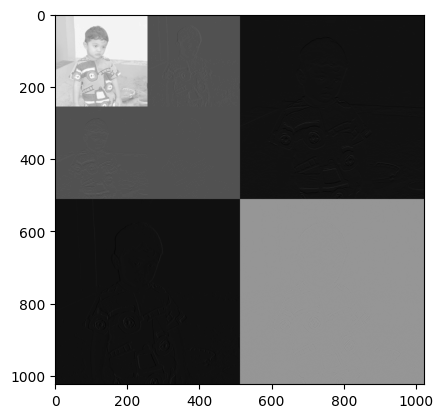

In [22]:
#memanggil fungsi Display1 untuk menyatukan 4 variabel citra A2, dH2, dV2 dan dD2 kemudian disimpan dalam variabel lvl2, lalu disatukan kembali 4 variabel citra lvl, dH2, dV2 dan dD2 dan disimpan dalam variabel lvl2,kemudian ditampilkan dengan bantuan fungsi imshow pada matplotlib
lvl2 = Display1(w2, x2, y2, z2)
lvl2 = Display1(lvl2, x1, y1, z1)
plt.imshow(lvl2, cmap = 'gray')

Script di atas terdapat 3 perintah, yaitu yang pertama "lvl2 = Display1(w2, x2, y2, z2)" memanggil fungsi "Display1" dengan empat parameter: w2, x2, y2, dan z2. Fungsi ini menghasilkan citra yang terdiri dari empat subplot, masing-masing merepresentasikan citra dengan hasil transformasi wavelet diskrit pada level 2. Citra yang dihasilkan disimpan dalam variabel "lvl2".
Selanjutnya yang kedua, "lvl2 = Display1(lvl2, x1, y1, z1)" memanggil kembali fungsi "Display1", namun pada pemanggilan ini parameter pertama adalah variabel "lvl2" yang mengandung citra hasil dari panggilan fungsi "Display1" sebelumnya. Parameter kedua hingga keempat tetap sama yaitu "x1", "y1", dan "z1". Ini berarti citra "lvl2" akan ditampilkan kembali dalam subplot pertama, dan subplot lainnya akan menampilkan citra-citra hasil transformasi wavelet diskrit pada level 1.
Terakhir yang ketiga, "plt.imshow(lvl2, cmap='gray')" menampilkan citra yang dihasilkan dari panggilan fungsi "Display1" terakhir, yaitu citra yang terdiri dari empat subplot dengan tampilan pada level 2 dan 1 hasil transformasi wavelet diskrit. Citra ditampilkan dalam format grayscale menggunakan perintah "cmap='gray'".